In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid


In [2]:
df = pd.read_excel('Merged_data.xlsx')
df['relative_humidity_2m (%)_lag3'] = df['relative_humidity_2m (%)'].shift(3)
df['wind_speed_10m(km/h)_lag6'] = df['wind_speed_10m (km/h)'].shift(6)
df['soil_moisture_0_to_7cm_lag72'] = df['soil_moisture_0_to_7cm (m³/m³)'].shift(72)
df['direct_radiation (W/m²)_lag72'] = df['direct_radiation (W/m²)'].shift(72)
df = df.dropna()
df_train_size = len(df) * 0.8
df_train = df[:int(df_train_size)]
df_test = df[int(df_train_size):]


In [3]:
df_train

,Date,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),turbidity,relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
72,2021-01-03 15:00:00,3.6,80,0.0,0.05,17.2,35.3,3.8,0.378,31,0.367532,85.0,9.1,0.391,55.0
73,2021-01-03 16:00:00,3.5,78,0.0,0.04,16.1,29.9,3.7,0.377,2,0.439294,80.0,11.5,0.391,25.0
74,2021-01-03 17:00:00,3.0,77,0.0,0.03,14.5,27.7,3.4,0.377,2,0.445193,78.0,13.6,0.390,3.0
75,2021-01-03 18:00:00,2.7,81,0.0,0.01,14.9,25.2,3.2,0.376,0,0.371390,80.0,15.3,0.389,0.0
76,2021-01-03 19:00:00,2.5,82,0.0,0.01,16.5,28.4,3.0,0.376,0,0.366914,78.0,17.9,0.388,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,2023-05-26 01:00:00,9.6,82,0.0,0.01,13.8,27.4,12.8,0.238,0,0.600299,71.0,13.4,0.260,0.0
21011,2023-05-26 02:00:00,9.1,83,0.0,0.01,13.2,22.7,12.1,0.238,0,0.619324,75.0,13.0,0.261,0.0
21012,2023-05-26 03:00:00,8.5,83,0.0,0.01,13.8,22.7,11.5,0.238,0,0.622378,79.0,14.7,0.261,0.0
21013,2023-05-26 04:00:00,8.0,85,0.0,0.01,13.2,22.7,11.0,0.239,0,0.605135,82.0,18.3,0.261,0.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20943 entries, 72 to 21014
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             20943 non-null  datetime64[ns]
 1   temperature_2m (°C)              20943 non-null  float64       
 2   relative_humidity_2m (%)         20943 non-null  int64         
 3   precipitation (mm)               20943 non-null  float64       
 4   et0_fao_evapotranspiration (mm)  20943 non-null  float64       
 5   wind_speed_10m (km/h)            20943 non-null  float64       
 6   wind_gusts_10m (km/h)            20943 non-null  float64       
 7   soil_temperature_0_to_7cm (°C)   20943 non-null  float64       
 8   soil_moisture_0_to_7cm (m³/m³)   20943 non-null  float64       
 9   direct_radiation (W/m²)          20943 non-null  int64         
 10  turbidity                        20943 non-null  float64      

In [5]:
df_train = df_train.rename(columns={'Date': 'ds',
                        'turbidity': 'y'})
df_train.head()

,ds,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
72,2021-01-03 15:00:00,3.6,80,0.0,0.05,17.2,35.3,3.8,0.378,31,0.367532,85.0,9.1,0.391,55.0
73,2021-01-03 16:00:00,3.5,78,0.0,0.04,16.1,29.9,3.7,0.377,2,0.439294,80.0,11.5,0.391,25.0
74,2021-01-03 17:00:00,3.0,77,0.0,0.03,14.5,27.7,3.4,0.377,2,0.445193,78.0,13.6,0.390,3.0
75,2021-01-03 18:00:00,2.7,81,0.0,0.01,14.9,25.2,3.2,0.376,0,0.371390,80.0,15.3,0.389,0.0
76,2021-01-03 19:00:00,2.5,82,0.0,0.01,16.5,28.4,3.0,0.376,0,0.366914,78.0,17.9,0.388,0.0


In [6]:
df_train['ds'] = pd.to_datetime(df_train['ds'], format='%Y-%m-%d %H:%M:%S')

In [7]:
df_train.head()

,ds,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
72,2021-01-03 15:00:00,3.6,80,0.0,0.05,17.2,35.3,3.8,0.378,31,0.367532,85.0,9.1,0.391,55.0
73,2021-01-03 16:00:00,3.5,78,0.0,0.04,16.1,29.9,3.7,0.377,2,0.439294,80.0,11.5,0.391,25.0
74,2021-01-03 17:00:00,3.0,77,0.0,0.03,14.5,27.7,3.4,0.377,2,0.445193,78.0,13.6,0.390,3.0
75,2021-01-03 18:00:00,2.7,81,0.0,0.01,14.9,25.2,3.2,0.376,0,0.371390,80.0,15.3,0.389,0.0
76,2021-01-03 19:00:00,2.5,82,0.0,0.01,16.5,28.4,3.0,0.376,0,0.366914,78.0,17.9,0.388,0.0


In [8]:
# Drop variables that are not needed
# df.drop(columns = ['column1', 'column2'])


# Exploratory Data Analysis

In [9]:
# Create a copy of the df with index
df_train_index = df_train.copy()
df_train_index.set_index('ds', inplace=True)

In [10]:
# Setting hourly frequency
df_train_index.index.freq = 'H'
df_train_index.index

C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_9476\145517804.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_train_index.index.freq = 'H'


DatetimeIndex(['2021-01-03 15:00:00', '2021-01-03 16:00:00',
               '2021-01-03 17:00:00', '2021-01-03 18:00:00',
               '2021-01-03 19:00:00', '2021-01-03 20:00:00',
               '2021-01-03 21:00:00', '2021-01-03 22:00:00',
               '2021-01-03 23:00:00', '2021-01-04 00:00:00',
               ...
               '2023-05-25 20:00:00', '2023-05-25 21:00:00',
               '2023-05-25 22:00:00', '2023-05-25 23:00:00',
               '2023-05-26 00:00:00', '2023-05-26 01:00:00',
               '2023-05-26 02:00:00', '2023-05-26 03:00:00',
               '2023-05-26 04:00:00', '2023-05-26 05:00:00'],
              dtype='datetime64[ns]', name='ds', length=20943, freq='h')

<Axes: title={'center': 'Turbidity over time'}, xlabel='ds'>

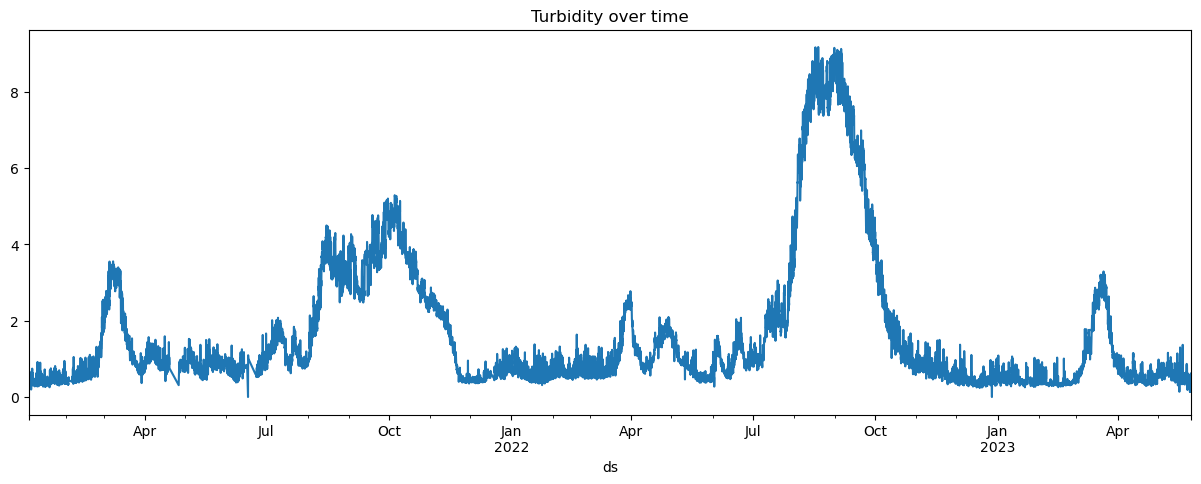

In [11]:
df_train_index['y'].plot(figsize=(15, 5), title='Turbidity over time')

C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_9476\2983038458.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df_train_index['y'].resample('M').mean(), ylabel='Turbidity(NTU)')


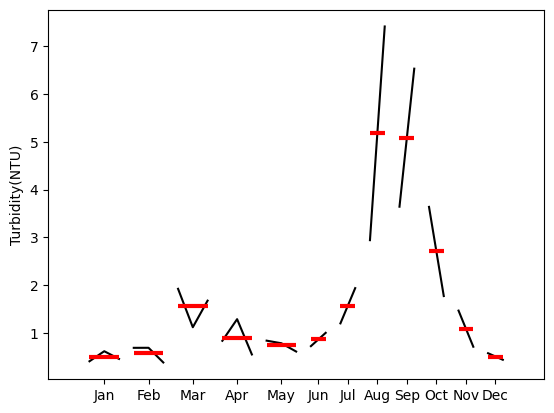

In [12]:
# Plotting the monthly seasonality
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(df_train_index['y'].resample('M').mean(), ylabel='Turbidity(NTU)')
plt.show()

C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_9476\1297698564.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df_train_index['y'].resample('Q').mean(), ylabel='Turbidity(NTU)')


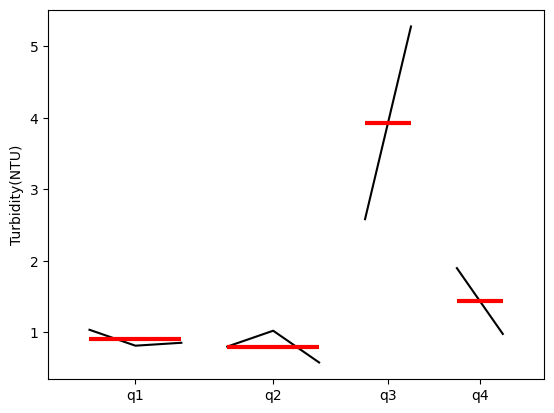

In [13]:
# Plotting the quarterly seasonality
quarter_plot(df_train_index['y'].resample('Q').mean(), ylabel='Turbidity(NTU)')
plt.show()

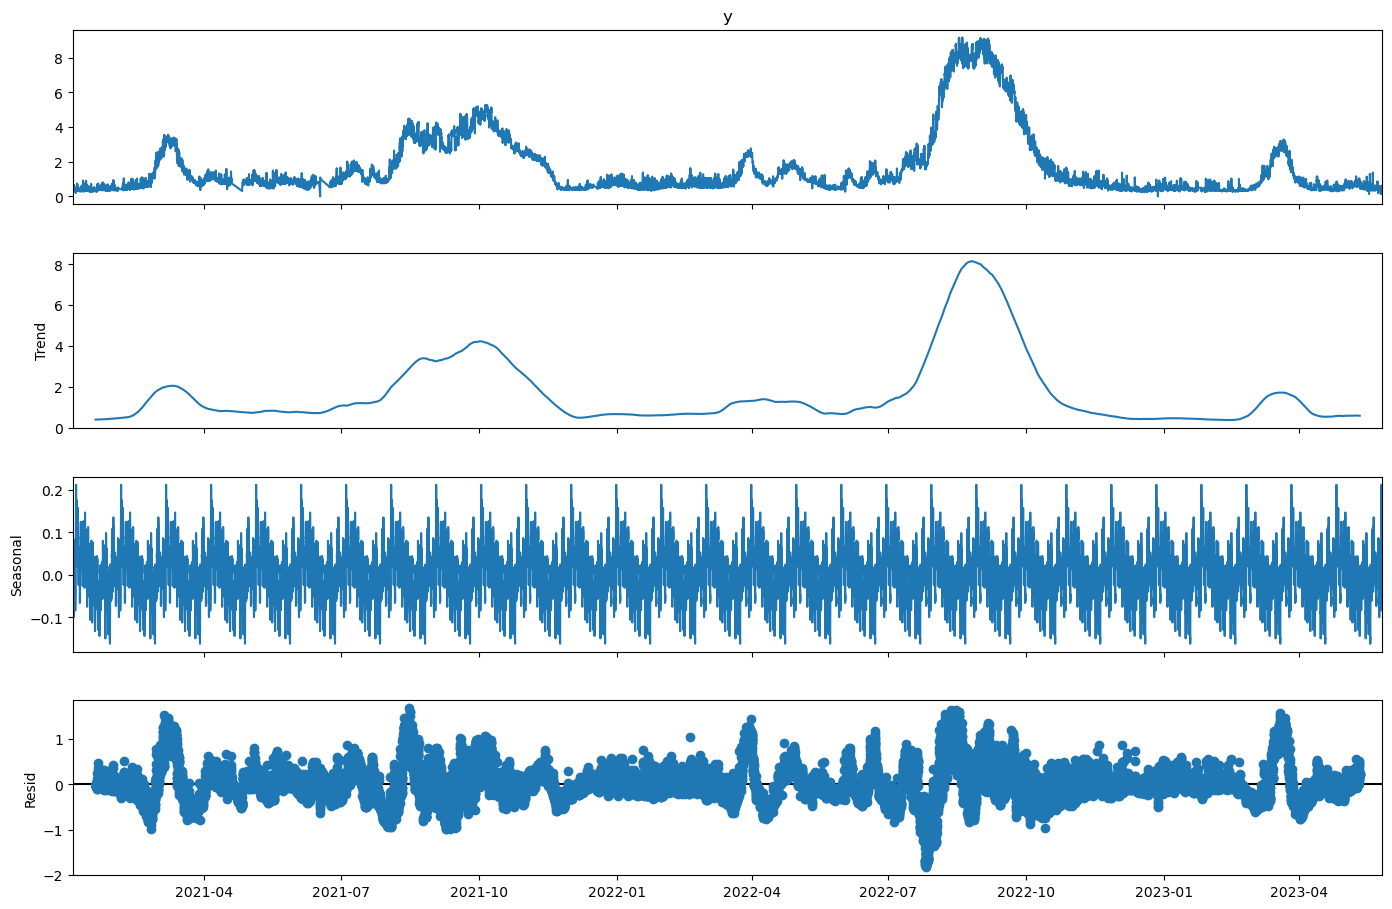

In [14]:
# Seasonal Decomposition plots
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_train_index['y'], model='additive', period=30*24)
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()




# Feature Engineering

# Creating lagged values for the regressors
for lag in [1, 3, 6, 12, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288]:
    df[f'temperature_2m (°C)_lag_{lag}'] = df['temperature_2m (°C)'].shift(lag)
    df[f'relative_humidity_2m (%)_lag_{lag}'] = df['relative_humidity_2m (%)'].shift(lag)
    df[f'precipitation (mm)_lag_{lag}'] = df['precipitation (mm)'].shift(lag)
    df[f'et0_fao_evapotranspiration (mm)_lag_{lag}'] = df['et0_fao_evapotranspiration (mm)'].shift(lag)
    df[f'wind_speed_10m (km/h)_lag_{lag}'] = df['wind_speed_10m (km/h)'].shift(lag)
    df[f'wind_gusts_10m (km/h)_lag_{lag}'] = df['wind_gusts_10m (km/h)'].shift(lag)
    df[f'soil_temperature_0_to_7cm (°C)_lag_{lag}'] = df['soil_temperature_0_to_7cm (°C)'].shift(lag)
    df[f'soil_moisture_0_to_7cm (m³/m³)_lag_{lag}'] = df['soil_moisture_0_to_7cm (m³/m³)'].shift(lag)
    df[f'direct_radiation (W/m²)_lag_{lag}'] = df['direct_radiation (W/m²)'].shift(lag)


df_train.head()

df_train.columns

# Correlation matrix between the non-lagged values, lagged values and y

columns = ['y'] + [
	f'{feature}_lag_{lag}'
	for feature in [
		'temperature_2m (°C)', 'relative_humidity_2m (%)', 'precipitation (mm)', 'et0_fao_evapotranspiration (mm)', 'wind_speed_10m (km/h)', 'wind_gusts_10m (km/h)',
		'soil_temperature_0_to_7cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)', 'direct_radiation (W/m²)'
	]
	for lag in [1, 3, 6, 12, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288]
]

corr = df_train[columns].corr()
corr


# Display the correlation matrix between y and temperature_2m (°C)
corr_y_temp = corr.loc['y', 'temperature_2m (°C)_lag_1':'temperature_2m (°C)_lag_288']
corr_y_temp



# Display the correlation matrix between y and relative_humidity_2m (%)
corr_y_humidity = corr.loc['y', 'relative_humidity_2m (%)_lag_1':'relative_humidity_2m (%)_lag_288']
corr_y_humidity



# Display the correlation matrix between y and precipitation (mm)
corr_y_precipitation = corr.loc['y', 'precipitation (mm)_lag_1':'precipitation (mm)_lag_288']
corr_y_precipitation

# Display the correlation matrix between y and et0_fao_evapotranspiration (mm)
corr_y_et0 = corr.loc['y', 'et0_fao_evapotranspiration (mm)_lag_1':'et0_fao_evapotranspiration (mm)_lag_288']   
corr_y_et0

# Display the correlation matrix between y and wind_speed_10m (km/h)
corr_y_wind_speed = corr.loc['y', 'wind_speed_10m (km/h)_lag_1':'wind_speed_10m (km/h)_lag_288']
corr_y_wind_speed


# Display the correlation matrix between y and wind_gusts_10m (km/h)
corr_y_wind_gusts = corr.loc['y', 'wind_gusts_10m (km/h)_lag_1':'wind_gusts_10m (km/h)_lag_288']
corr_y_wind_gusts


# display the correlation matrix between y and soil_temperature_0_to_7cm (°C)
corr_y_soil_temp = corr.loc['y', 'soil_temperature_0_to_7cm (°C)_lag_1':'soil_temperature_0_to_7cm (°C)_lag_288']
corr_y_soil_temp


# display the correlation matrix between y and soil_moisture_0_to_7cm (m³/m³)
corr_y_soil_moisture = corr.loc['y', 'soil_moisture_0_to_7cm (m³/m³)_lag_1':'soil_moisture_0_to_7cm (m³/m³)_lag_288']   
corr_y_soil_moisture


# Display the correlation matrix between y and direct_radiation (W/m²)
corr_y_direct_radiation = corr.loc['y', 'direct_radiation (W/m²)_lag_1':'direct_radiation (W/m²)_lag_288']
corr_y_direct_radiation


# Creating lagged values for the regressors
# df[f'temperature_2m (°C)_lag_{lag}'] = df['temperature_2m (°C)'].shift(3)
df[f'relative_humidity_2m (%)_lag_{lag}'] = df['relative_humidity_2m (%)'].shift(3)
df[f'wind_speed_10m (km/h)_lag_{lag}'] = df['wind_speed_10m (km/h)'].shift(12)
# df[f'wind_gusts_10m (km/h)_lag_{lag}'] = df['wind_gusts_10m (km/h)'].shift(168)
# df[f'soil_temperature_0_to_7cm (°C)_lag_{lag}'] = df['soil_temperature_0_to_7cm (°C)'].shift(72)
df[f'soil_moisture_0_to_7cm (m³/m³)_lag_{lag}'] = df['soil_moisture_0_to_7cm (m³/m³)'].shift(72)
df[f'direct_radiation (W/m²)_lag_{lag}'] = df['direct_radiation (W/m²)'].shift(72)


# Correlation matrix between the lagged values and y
columns = (
	['y'] +
	[
		'temperature_2m (°C)', 'relative_humidity_2m (%)', 'wind_speed_10m (km/h)', 
		 'soil_moisture_0_to_7cm (m³/m³)', 'direct_radiation (W/m²)'
	] +
	[
		'relative_humidity_2m (%)_lag_3', 'wind_speed_10m (km/h)_lag_6', 
		'soil_moisture_0_to_7cm (m³/m³)_lag_72', 'direct_radiation (W/m²)_lag_72'
	]
)

corr = df_train[columns].corr()
corr


In [15]:
# features: temperature, relative_humidity_3, wind_speed_6, soil_moisture_72, direct_radiation_72
# target: y (turbidity)

# Prophet model

In [16]:
# Look at df
df_train.head()

,ds,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),y,relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
72,2021-01-03 15:00:00,3.6,80,0.0,0.05,17.2,35.3,3.8,0.378,31,0.367532,85.0,9.1,0.391,55.0
73,2021-01-03 16:00:00,3.5,78,0.0,0.04,16.1,29.9,3.7,0.377,2,0.439294,80.0,11.5,0.391,25.0
74,2021-01-03 17:00:00,3.0,77,0.0,0.03,14.5,27.7,3.4,0.377,2,0.445193,78.0,13.6,0.390,3.0
75,2021-01-03 18:00:00,2.7,81,0.0,0.01,14.9,25.2,3.2,0.376,0,0.371390,80.0,15.3,0.389,0.0
76,2021-01-03 19:00:00,2.5,82,0.0,0.01,16.5,28.4,3.0,0.376,0,0.366914,78.0,17.9,0.388,0.0


In [17]:
# Remove all lagged values but keep relative_humidity_3, wind_speed_6, soil_moisture_72, direct_radiation_72
df_train = df_train[['ds', 'y', 'temperature_2m (°C)', 'relative_humidity_2m (%)_lag3', 'wind_speed_10m(km/h)_lag6', 'soil_moisture_0_to_7cm_lag72', 'direct_radiation (W/m²)_lag72']]
df_train.head()

,ds,y,temperature_2m (°C),relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
72,2021-01-03 15:00:00,0.367532,3.6,85.0,9.1,0.391,55.0
73,2021-01-03 16:00:00,0.439294,3.5,80.0,11.5,0.391,25.0
74,2021-01-03 17:00:00,0.445193,3.0,78.0,13.6,0.390,3.0
75,2021-01-03 18:00:00,0.371390,2.7,80.0,15.3,0.389,0.0
76,2021-01-03 19:00:00,0.366914,2.5,78.0,17.9,0.388,0.0


In [18]:
# Remove any NAs
df_train = df_train.dropna()


In [19]:
%pip install prophet
from prophet import Prophet

In [20]:
# Building the prophet model
m = Prophet(
   # daily_seasonality=False,
   # weekly_seasonality=False,
   # yearly_seasonality=True,
   # monthly_seasonality=True,
    seasonality_mode='additive',
    seasonality_prior_scale=10,
    changepoint_prior_scale=0.05
)


m.add_regressor('temperature_2m (°C)')
m.add_regressor('relative_humidity_2m (%)_lag3')
m.add_regressor('wind_speed_10m(km/h)_lag6')
m.add_regressor('soil_moisture_0_to_7cm_lag72')
m.add_regressor('direct_radiation (W/m²)_lag72')


m.fit(df_train)

13:13:04 - cmdstanpy - INFO - Chain [1] start processing
13:13:44 - cmdstanpy - INFO - Chain [1] done processing


# Regressor Coefficients

In [21]:
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)


,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,temperature_2m (°C),additive,10.746698,0.002954,0.002954,0.002954
1,relative_humidity_2m (%)_lag3,additive,78.052142,-0.002191,-0.002191,-0.002191
2,wind_speed_10m(km/h)_lag6,additive,13.725068,0.002156,0.002156,0.002156
3,soil_moisture_0_to_7cm_lag72,additive,0.320853,-1.599964,-1.599964,-1.599964
4,direct_radiation (W/m²)_lag72,additive,75.214964,-0.000148,-0.000148,-0.000148


In [22]:
# Build a function to interpret the coefficients
def interpret_prophet_coeficients(df):

    interpretation = []
    for _, row in df.iterrows():
        regressor = row['regressor']
        mode = row['regressor_mode']
        coef = row['coef']
        effect_type = 'positive' if coef > 0 else 'negative' if coef < 0 else 'zero'

        if mode == 'multiplicative':
            interpretation.append(f"The {regressor} has a {effect_type} multiplicative effect on the target variable.")
        elif mode == 'additive':
            interpretation.append(f"The {regressor} has a {effect_type} additive effect on the target variable.")
        else:
            interpretation.append(f"The {regressor} has an unknown effect on the target variable.")
  

    return interpretation

coefs = pd.DataFrame(regressor_coefficients(m))
interpretation = interpret_prophet_coeficients(coefs)
for interpret in interpretation:
    print(interpret)


The temperature_2m (°C) has a positive additive effect on the target variable.
The relative_humidity_2m (%)_lag3 has a negative additive effect on the target variable.
The wind_speed_10m(km/h)_lag6 has a positive additive effect on the target variable.
The soil_moisture_0_to_7cm_lag72 has a negative additive effect on the target variable.
The direct_radiation (W/m²)_lag72 has a negative additive effect on the target variable.


# Cross-Validation

In [23]:
from prophet.diagnostics import cross_validation


In [24]:
# Apply the CV to the model
df_train_cv = cross_validation(model=m, period='720 hours', horizon='168 hours', initial='8760 hours', parallel='processes')

df_train_cv.head()
df_train_cv.info()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          2856 non-null   datetime64[ns]
 1   yhat        2856 non-null   float64       
 2   yhat_lower  2856 non-null   float64       
 3   yhat_upper  2856 non-null   float64       
 4   y           2856 non-null   float64       
 5   cutoff      2856 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 134.0 KB


In [25]:
# Performance metrics
from prophet.diagnostics import performance_metrics
performance_metrics(df_train_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 17:00:00,0.195831,0.442528,0.323606,0.307172,0.220127,0.293308,0.751496
1,0 days 18:00:00,0.198017,0.444992,0.328186,0.316616,0.233656,0.300874,0.750671
2,0 days 19:00:00,0.200556,0.447835,0.333338,0.323703,0.239748,0.307050,0.740144
3,0 days 20:00:00,0.205531,0.453355,0.339912,0.332838,0.242147,0.314756,0.729618
4,0 days 21:00:00,0.208536,0.456657,0.344264,0.339666,0.242147,0.320568,0.721775
...,...,...,...,...,...,...,...,...
147,6 days 20:00:00,0.762924,0.873455,0.664829,0.605633,0.477941,0.574689,0.475748
148,6 days 21:00:00,0.759984,0.871770,0.664876,0.600744,0.477941,0.576866,0.488132
149,6 days 22:00:00,0.759144,0.871289,0.666570,0.599704,0.493308,0.580225,0.488958
150,6 days 23:00:00,0.757318,0.870240,0.666685,0.594323,0.480440,0.582284,0.492466


In [26]:
# RMSE and MAPE
rmse = performance_metrics(df_train_cv)['rmse'].mean()
mape = performance_metrics(df_train_cv)['mape'].mean()
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RMSE: 0.7227445845813335
MAPE: 0.464121540390854


c:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\Yin Jianing\anaconda3\envs\timeseri

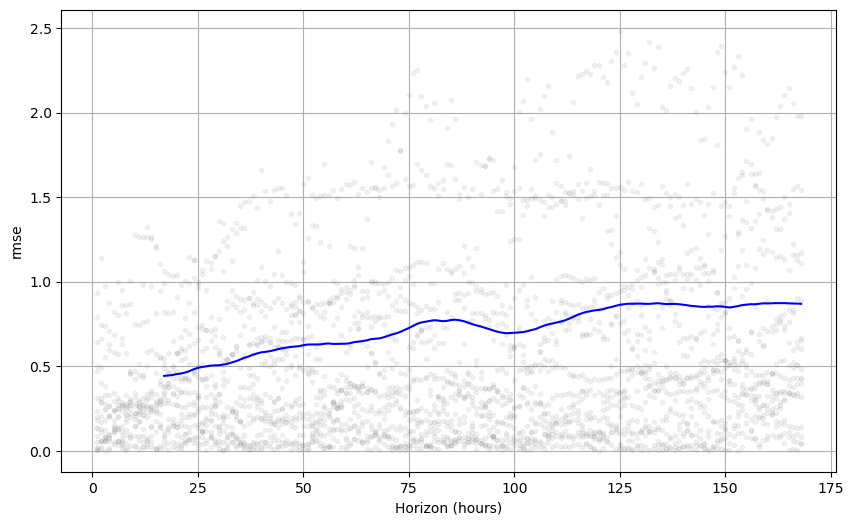

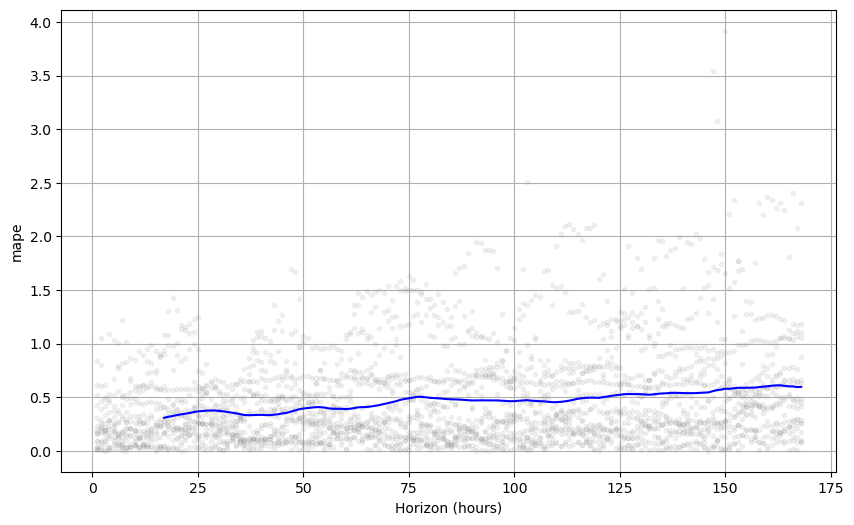

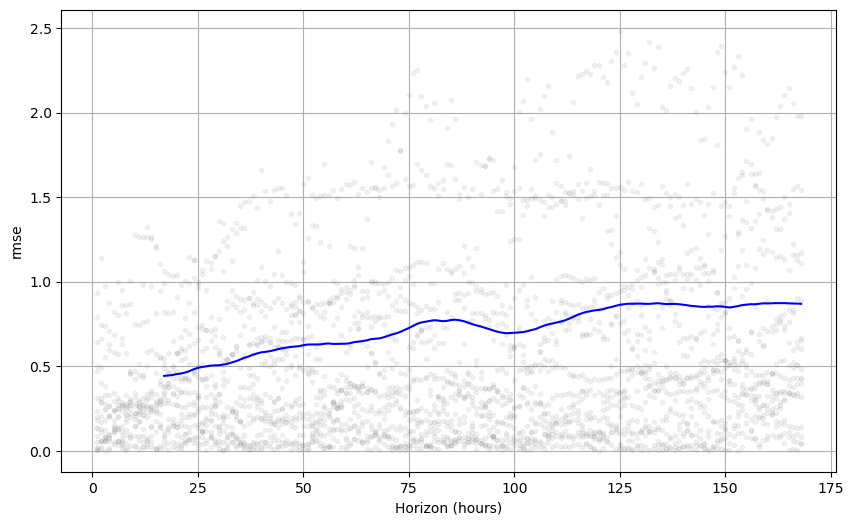

In [27]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_train_cv, metric='mape')
plot_cross_validation_metric(df_train_cv, metric='rmse')


# Explore the Error

In [28]:
# Compute the Error / deviation
df_train_cv['deviation'] = df_train_cv['yhat'] - df_train_cv['y']



In [29]:
# Hours with the highest deviation
df_train_cv.sort_values(by='deviation', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation
1468,2022-09-26 10:00:00,6.672685,6.184430,7.150295,4.188229,2022-09-21 05:00:00,2.484457
1475,2022-09-26 17:00:00,6.552852,6.047335,7.026256,4.137559,2022-09-21 05:00:00,2.415293
1492,2022-09-27 10:00:00,6.464469,5.947472,6.951490,4.069559,2022-09-21 05:00:00,2.394910
1477,2022-09-26 19:00:00,6.504706,6.012053,6.932215,4.119195,2022-09-21 05:00:00,2.385511
1467,2022-09-26 09:00:00,6.681306,6.196946,7.154142,4.322075,2022-09-21 05:00:00,2.359231
1491,2022-09-27 09:00:00,6.451979,6.003439,6.967250,4.093887,2022-09-21 05:00:00,2.358092
1470,2022-09-26 12:00:00,6.676070,6.222272,7.144743,4.323823,2022-09-21 05:00:00,2.352247
1496,2022-09-27 14:00:00,6.537592,6.036142,7.019378,4.203164,2022-09-21 05:00:00,2.334428
1466,2022-09-26 08:00:00,6.650238,6.171731,7.118915,4.347548,2022-09-21 05:00:00,2.302689
1474,2022-09-26 16:00:00,6.598619,6.134294,7.098029,4.302333,2022-09-21 05:00:00,2.296287


In [30]:
# Houres with the lowest deviation
df_train_cv.sort_values(by='deviation', ascending = True).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation
483,2022-03-31 09:00:00,0.966071,0.584188,1.380351,2.771712,2022-03-25 05:00:00,-1.805641
408,2022-03-28 06:00:00,0.749899,0.356266,1.129526,2.525680,2022-03-25 05:00:00,-1.775781
441,2022-03-29 15:00:00,0.909766,0.514598,1.251994,2.666147,2022-03-25 05:00:00,-1.756381
429,2022-03-29 03:00:00,0.752561,0.386716,1.136615,2.483873,2022-03-25 05:00:00,-1.731312
430,2022-03-29 04:00:00,0.751498,0.398132,1.114108,2.470670,2022-03-25 05:00:00,-1.719172
1162,2022-07-29 16:00:00,2.256319,1.840573,2.643475,3.972258,2022-07-23 05:00:00,-1.715939
426,2022-03-29 00:00:00,0.771683,0.394448,1.178926,2.481020,2022-03-25 05:00:00,-1.709337
401,2022-03-27 23:00:00,0.722882,0.334342,1.116482,2.432027,2022-03-25 05:00:00,-1.709145
412,2022-03-28 10:00:00,0.769628,0.379053,1.115688,2.465763,2022-03-25 05:00:00,-1.696135
419,2022-03-28 17:00:00,0.826384,0.444801,1.224714,2.521790,2022-03-25 05:00:00,-1.695406


In [31]:
# Compute the Error / deviation
df_train_cv['deviation_%'] = ( df_train_cv['yhat'] / df_train_cv['y'] - 1 ) *100

In [32]:
# Hours with the highest deviation in percentage
df_train_cv.sort_values(by='deviation_%', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
2837,2023-05-25 11:00:00,0.671972,0.141619,1.113179,0.136613,2023-05-19 05:00:00,0.535359,391.879238
2834,2023-05-25 08:00:00,0.615674,0.156599,1.103996,0.135513,2023-05-19 05:00:00,0.480161,354.327770
2835,2023-05-25 09:00:00,0.629802,0.151377,1.107190,0.154532,2023-05-19 05:00:00,0.475270,307.554664
2790,2023-05-23 12:00:00,0.646683,0.184952,1.079420,0.184311,2023-05-19 05:00:00,0.462372,250.864887
333,2022-03-02 03:00:00,1.636074,1.252669,1.966648,0.480014,2022-02-23 05:00:00,1.156060,240.838745
327,2022-03-01 21:00:00,1.692297,1.341316,2.060224,0.502749,2022-02-23 05:00:00,1.189548,236.608729
2839,2023-05-25 13:00:00,0.754374,0.256188,1.187774,0.225934,2023-05-19 05:00:00,0.528441,233.892183
328,2022-03-01 22:00:00,1.682100,1.352961,2.063800,0.504272,2022-02-23 05:00:00,1.177828,233.570124
335,2022-03-02 05:00:00,1.678728,1.309261,2.039017,0.506366,2022-02-23 05:00:00,1.172362,231.524767
330,2022-03-02 00:00:00,1.653098,1.287287,2.041548,0.498803,2022-02-23 05:00:00,1.154295,231.412887


In [33]:
# Hours with the highest deviation in percentage
df_train_cv.sort_values(by='deviation_%', ascending = True).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
1679,2022-10-28 05:00:00,-0.095479,-0.527803,0.365798,1.012279,2022-10-21 05:00:00,-1.107758,-109.432039
1678,2022-10-28 04:00:00,-0.076644,-0.545769,0.376226,1.080247,2022-10-21 05:00:00,-1.156891,-107.095019
1675,2022-10-28 01:00:00,-0.073242,-0.507371,0.391566,1.299035,2022-10-21 05:00:00,-1.372277,-105.638178
1674,2022-10-28 00:00:00,-0.068643,-0.497129,0.393585,1.240445,2022-10-21 05:00:00,-1.309089,-105.533778
1676,2022-10-28 02:00:00,-0.059516,-0.492694,0.383089,1.347235,2022-10-21 05:00:00,-1.406751,-104.417663
1669,2022-10-27 19:00:00,-0.056562,-0.515122,0.404076,1.585493,2022-10-21 05:00:00,-1.642055,-103.567476
1668,2022-10-27 18:00:00,-0.052906,-0.513344,0.419810,1.516279,2022-10-21 05:00:00,-1.569185,-103.489194
1677,2022-10-28 03:00:00,-0.039547,-0.512955,0.457611,1.182364,2022-10-21 05:00:00,-1.221911,-103.344728
1667,2022-10-27 17:00:00,-0.039545,-0.484570,0.434086,1.595840,2022-10-21 05:00:00,-1.635385,-102.478007
1670,2022-10-27 20:00:00,-0.036961,-0.481179,0.410543,1.500595,2022-10-21 05:00:00,-1.537557,-102.463120


# Parameter Tuning

In [34]:
# Define the parameter grid to search
param_gird = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [10, 20],
    'changepoint_prior_scale': [0.05, 0.5, 1]
}



In [35]:
# Generate all combinations of parameters
all_params = list(ParameterGrid(param_gird))
# Print the parameter grid
all_params

[{'changepoint_prior_scale': 0.05,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.5,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.5,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.5,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.5,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 1,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 1,
  'seasonality_mode': 'a

In [36]:
# Placeholder for results
tuning_results = []
# Build a pipeline for the parameter tuning
for params in all_params:
    
    # Create a new model with the current parameters
    m = Prophet(
        seasonality_mode=params['seasonality_mode'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        changepoint_prior_scale=params['changepoint_prior_scale']
    )

    # Add regressors
    m.add_regressor('temperature_2m (°C)')
    m.add_regressor('relative_humidity_2m (%)_lag3')
    m.add_regressor('wind_speed_10m(km/h)_lag6')
    m.add_regressor('soil_moisture_0_to_7cm_lag72')
    m.add_regressor('direct_radiation (W/m²)_lag72')

    # Fit the model
    m.fit(df_train)

    # Cross-validation
    df_train_cv = cross_validation(model=m, period='720 hours', horizon='168 hours', initial='8760 hours', parallel='processes')

    # Calculate RMSE and MAPE
    rmse = performance_metrics(df_train_cv)['rmse'].mean()
    mape = performance_metrics(df_train_cv)['mape'].mean()

    # Store the results
    tuning_results.append({
        'params': params,
        'rmse': rmse,
        'mape': mape
    })

13:21:19 - cmdstanpy - INFO - Chain [1] start processing
13:21:58 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
13:29:10 - cmdstanpy - INFO - Chain [1] start processing
13:29:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
13:36:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:15 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
13:45:18 - cmdstanpy - INFO - Chain [1] start processing
13:46:00 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
13:54:02 - cmdstanpy - INFO - Chain [1] start processing
13:54:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has per

In [37]:
tuning_results
# Show the results in a DataFrame
tuning_results_df = pd.DataFrame(tuning_results)
tuning_results_df.sort_values(by='rmse', ascending=True, inplace=True)
tuning_results_df
tuning_results = tuning_results_df['rmse']

In [38]:
# Parameter Tuning Outcome
outcome = pd.DataFrame(all_params)
outcome['tuning_results'] = tuning_results
outcome

,changepoint_prior_scale,seasonality_mode,seasonality_prior_scale,tuning_results
0,0.05,additive,10,0.722745
1,0.05,additive,20,0.714219
2,0.05,multiplicative,10,0.796888
3,0.05,multiplicative,20,0.796349
4,0.50,additive,10,0.503228
5,0.50,additive,20,0.512949
6,0.50,multiplicative,10,0.786371
7,0.50,multiplicative,20,0.788524
8,1.00,additive,10,0.540608
9,1.00,additive,20,0.489358


In [39]:
# Fetch the best parameters 
best_params = all_params[tuning_results.idxmin()]

best_params




{'changepoint_prior_scale': 1,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 20}

# Predict the future

In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20943 entries, 72 to 21014
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             20943 non-null  datetime64[ns]
 1   y                              20943 non-null  float64       
 2   temperature_2m (°C)            20943 non-null  float64       
 3   relative_humidity_2m (%)_lag3  20943 non-null  float64       
 4   wind_speed_10m(km/h)_lag6      20943 non-null  float64       
 5   soil_moisture_0_to_7cm_lag72   20943 non-null  float64       
 6   direct_radiation (W/m²)_lag72  20943 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.3 MB


In [93]:
# Remove any NAs
df_train = df_train.dropna()


In [94]:
# Building the prophet model with best_params
m = Prophet(**best_params)

m.add_regressor('temperature_2m (°C)')
m.add_regressor('relative_humidity_2m (%)_lag3')
m.add_regressor('wind_speed_10m(km/h)_lag6')
m.add_regressor('soil_moisture_0_to_7cm_lag72')
m.add_regressor('direct_radiation (W/m²)_lag72')

m.fit(df_train)


15:36:57 - cmdstanpy - INFO - Chain [1] start processing
15:37:58 - cmdstanpy - INFO - Chain [1] done processing


In [95]:
df_test.columns

Index(['ds', 'temperature_2m (°C)', 'y', 'relative_humidity_2m (%)_lag3',
       'wind_speed_10m(km/h)_lag6', 'soil_moisture_0_to_7cm_lag72',
       'direct_radiation (W/m²)_lag72'],
      dtype='object')

In [96]:
# Remove any NAs
df_test = df_test.dropna()

In [98]:
df_test = df_test.rename(columns={'Date': 'ds',
                        'turbidity': 'y'})



# Forecasting

In [153]:
df_test

,ds,temperature_2m (°C),y,relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
21015,2023-05-26 06:00:00,8.1,0.422402,83.0,16.6,0.261,0.0
21016,2023-05-26 07:00:00,9.1,0.307034,85.0,13.8,0.261,8.0
21017,2023-05-26 08:00:00,10.5,0.288146,87.0,13.2,0.261,9.0
21018,2023-05-26 09:00:00,12.1,0.280129,86.0,13.8,0.261,4.0
21019,2023-05-26 10:00:00,13.7,0.274884,82.0,13.2,0.260,226.0
...,...,...,...,...,...,...,...
26246,2023-12-30 05:00:00,6.9,0.455236,87.0,23.8,0.397,0.0
26247,2023-12-30 06:00:00,6.9,0.398240,88.0,21.1,0.404,0.0
26248,2023-12-30 07:00:00,6.7,0.413984,88.0,21.6,0.408,0.0
26249,2023-12-30 08:00:00,6.6,0.435343,90.0,22.9,0.409,0.0


In [174]:

# make predictions
future = m.make_future_dataframe(periods=len(df_test), freq='H')
future = future.merge(df_test, on='ds', how='left')
future = future[['ds', 'temperature_2m (°C)', 'relative_humidity_2m (%)_lag3', 'wind_speed_10m(km/h)_lag6', 'soil_moisture_0_to_7cm_lag72', 'direct_radiation (W/m²)_lag72']]
future = future.dropna()


future




c:\Users\Yin Jianing\anaconda3\envs\timeseries\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds,temperature_2m (°C),relative_humidity_2m (%)_lag3,wind_speed_10m(km/h)_lag6,soil_moisture_0_to_7cm_lag72,direct_radiation (W/m²)_lag72
20943,2023-05-26 06:00:00,8.1,83.0,16.6,0.261,0.0
20944,2023-05-26 07:00:00,9.1,85.0,13.8,0.261,8.0
20945,2023-05-26 08:00:00,10.5,87.0,13.2,0.261,9.0
20946,2023-05-26 09:00:00,12.1,86.0,13.8,0.261,4.0
20947,2023-05-26 10:00:00,13.7,82.0,13.2,0.260,226.0
...,...,...,...,...,...,...
26174,2023-12-30 05:00:00,6.9,87.0,23.8,0.397,0.0
26175,2023-12-30 06:00:00,6.9,88.0,21.1,0.404,0.0
26176,2023-12-30 07:00:00,6.7,88.0,21.6,0.408,0.0
26177,2023-12-30 08:00:00,6.6,90.0,22.9,0.409,0.0


In [175]:
future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5236 entries, 20943 to 26178
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             5236 non-null   datetime64[ns]
 1   temperature_2m (°C)            5236 non-null   float64       
 2   relative_humidity_2m (%)_lag3  5236 non-null   float64       
 3   wind_speed_10m(km/h)_lag6      5236 non-null   float64       
 4   soil_moisture_0_to_7cm_lag72   5236 non-null   float64       
 5   direct_radiation (W/m²)_lag72  5236 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 286.3 KB


In [176]:
# Make the predictions
forecast = m.predict(future)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,wind_speed_10m(km/h)_lag6,wind_speed_10m(km/h)_lag6_lower,wind_speed_10m(km/h)_lag6_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-26 06:00:00,1.289951,0.161990,1.081060,1.289951,1.289951,-0.670992,-0.670992,-0.670992,-0.030173,...,0.006067,0.006067,0.006067,-0.735009,-0.735009,-0.735009,0.0,0.0,0.0,0.618958
1,2023-05-26 07:00:00,1.290034,0.170428,1.097441,1.290034,1.290034,-0.668658,-0.668658,-0.668658,-0.018718,...,0.000158,0.000158,0.000158,-0.735711,-0.735711,-0.735711,0.0,0.0,0.0,0.621377
2,2023-05-26 08:00:00,1.290118,0.195345,1.088062,1.290118,1.290118,-0.653888,-0.653888,-0.653888,-0.002142,...,-0.001108,-0.001108,-0.001108,-0.736420,-0.736420,-0.736420,0.0,0.0,0.0,0.636231
3,2023-05-26 09:00:00,1.290202,0.196005,1.085828,1.290202,1.290202,-0.628257,-0.628257,-0.628257,0.014641,...,0.000158,0.000158,0.000158,-0.737136,-0.737136,-0.737136,0.0,0.0,0.0,0.661946
4,2023-05-26 10:00:00,1.290286,0.209630,1.117681,1.290286,1.290286,-0.637154,-0.637154,-0.637154,0.027964,...,-0.001108,-0.001108,-0.001108,-0.737860,-0.737860,-0.737860,0.0,0.0,0.0,0.653133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,2023-12-30 05:00:00,1.729084,-34.412239,37.366193,-33.887588,37.800321,-0.565530,-0.565530,-0.565530,-0.034609,...,0.021260,0.021260,0.021260,-0.363627,-0.363627,-0.363627,0.0,0.0,0.0,1.163554
5232,2023-12-30 06:00:00,1.729168,-34.635656,37.033736,-33.894574,37.807587,-0.582846,-0.582846,-0.582846,-0.030173,...,0.015563,0.015563,0.015563,-0.363932,-0.363932,-0.363932,0.0,0.0,0.0,1.146322
5233,2023-12-30 07:00:00,1.729252,-34.239899,37.267720,-33.901560,37.814853,-0.579475,-0.579475,-0.579475,-0.018718,...,0.016618,0.016618,0.016618,-0.364238,-0.364238,-0.364238,0.0,0.0,0.0,1.149777
5234,2023-12-30 08:00:00,1.729336,-34.498366,37.564784,-33.908546,37.822119,-0.567619,-0.567619,-0.567619,-0.002142,...,0.019361,0.019361,0.019361,-0.364545,-0.364545,-0.364545,0.0,0.0,0.0,1.161717


In [177]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ds                                   5236 non-null   datetime64[ns]
 1   trend                                5236 non-null   float64       
 2   yhat_lower                           5236 non-null   float64       
 3   yhat_upper                           5236 non-null   float64       
 4   trend_lower                          5236 non-null   float64       
 5   trend_upper                          5236 non-null   float64       
 6   additive_terms                       5236 non-null   float64       
 7   additive_terms_lower                 5236 non-null   float64       
 8   additive_terms_upper                 5236 non-null   float64       
 9   daily                                5236 non-null   float64       
 10  daily_lower 

# Data Visualization

<Axes: >

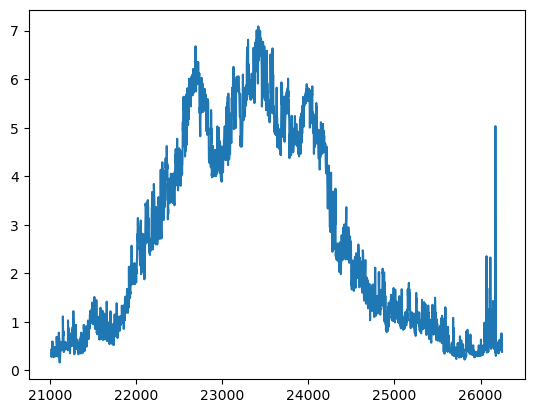

In [178]:
df_test['y'].plot()

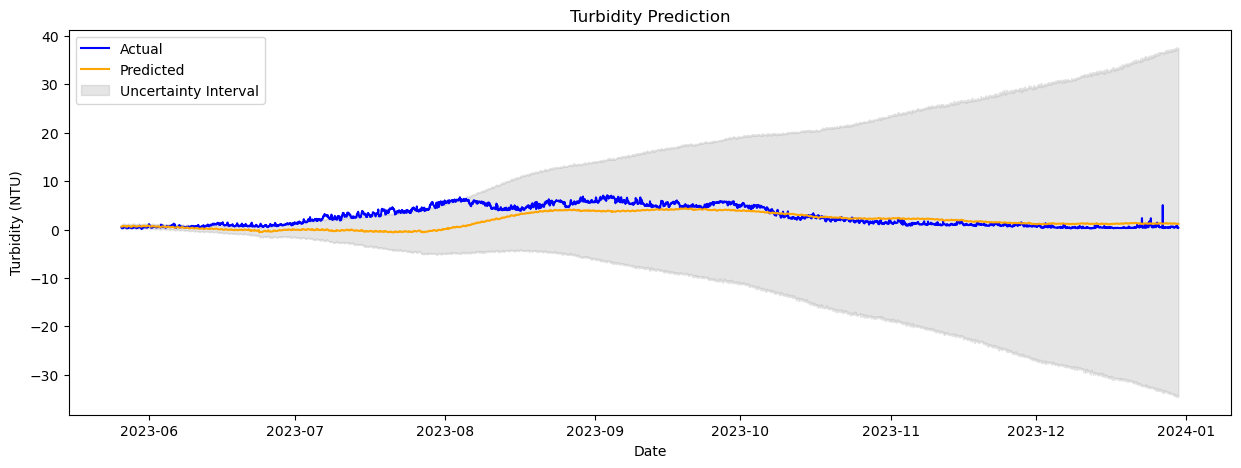

In [179]:
# Visualize time series plot
plt.figure(figsize=(15, 5))
plt.plot(df_test['ds'], df_test['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Turbidity Prediction')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.show()


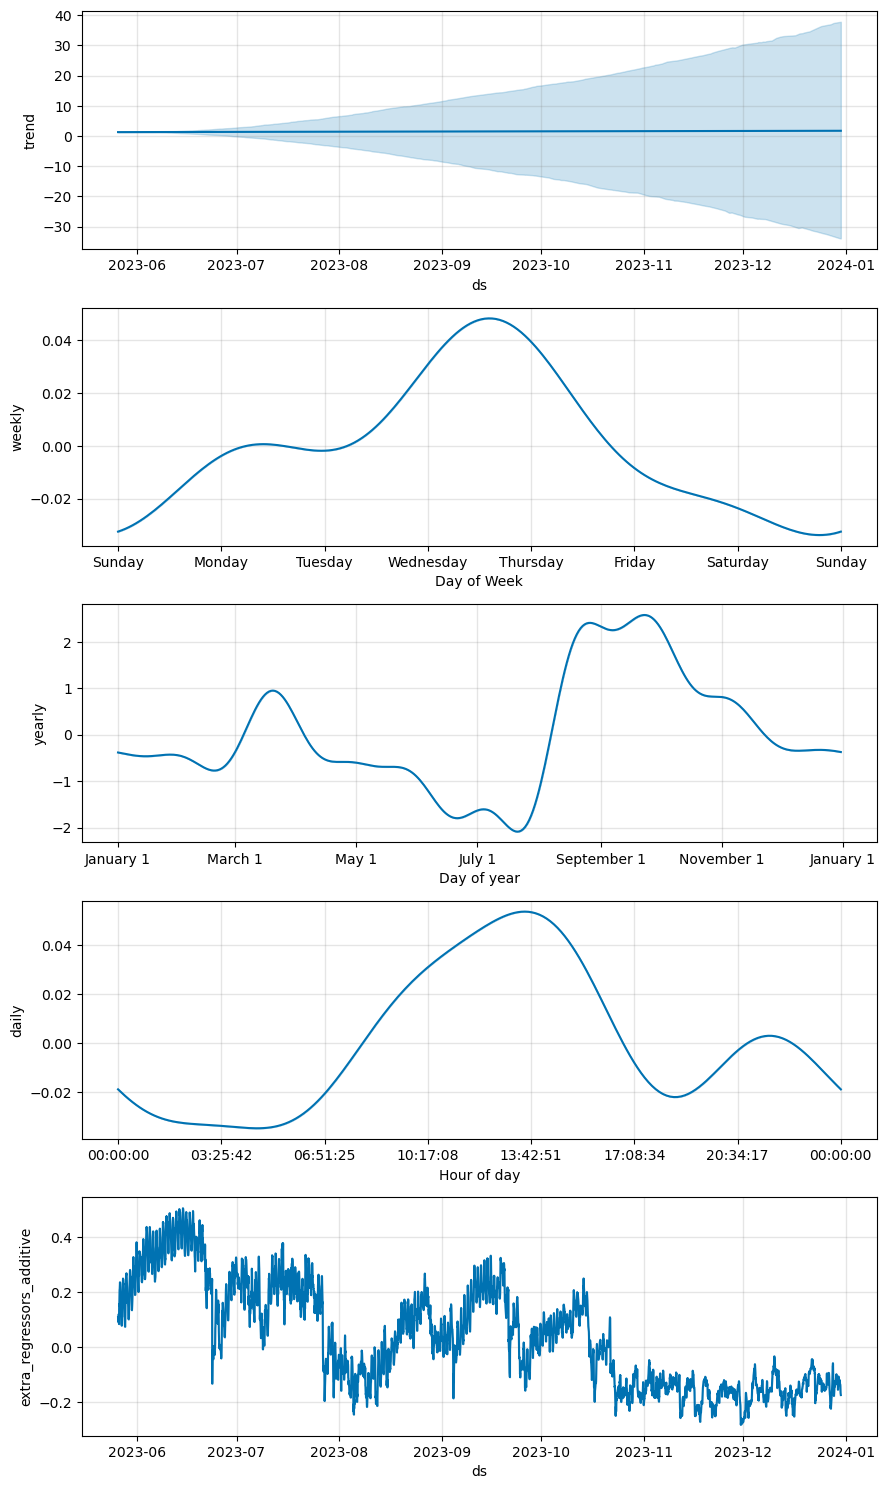

In [180]:
# Visualize components plot
m.plot_components(forecast)
plt.show()